In [1]:
import nibabel as nib
import numpy as np
from nibabel import Nifti1Image
import matplotlib.pyplot as plt

In [10]:
import os
import pandas as pd
base_folder: str = "/Volumes/Data/kaggle/raw"
segmentations_folder: str = os.path.join(base_folder,"segmentations")
training_folder: str = os.path.join(base_folder, "train_images")


segmentations_df = pd.DataFrame({
    "segmentations": os.listdir(segmentations_folder)
})

segmentations_df["StudyInstanceUID"] = segmentations_df["segmentations"].str.strip(".nii")

segmentations_df = segmentations_df.set_index("StudyInstanceUID")

training_df = pd.DataFrame({
    "training": os.listdir(training_folder)
})

training_df["StudyInstanceUID"] = training_df["training"]

training_df = training_df.set_index("StudyInstanceUID")

train_df = pd.read_csv(base_folder+"/train.csv")
train_df = train_df.set_index("StudyInstanceUID")

df = pd.concat([segmentations_df, training_df, train_df], axis=1)

df

,segmentations,training,patient_overall,C1,C2,C3,C4,C5,C6,C7
StudyInstanceUID,,,,,,,,,,
1.2.826.0.1.3680043.2243,1.2.826.0.1.3680043.2243.nii,1.2.826.0.1.3680043.2243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2.826.0.1.3680043.3376,1.2.826.0.1.3680043.3376.nii,1.2.826.0.1.3680043.3376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2.826.0.1.3680043.18906,1.2.826.0.1.3680043.18906.nii,1.2.826.0.1.3680043.18906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2.826.0.1.3680043.18480,1.2.826.0.1.3680043.18480.nii,1.2.826.0.1.3680043.18480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2.826.0.1.3680043.30640,1.2.826.0.1.3680043.30640.nii,1.2.826.0.1.3680043.30640,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1.2.826.0.1.3680043.5647,NaN,1.2.826.0.1.3680043.5647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.2.826.0.1.3680043.21171,NaN,1.2.826.0.1.3680043.21171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1.2.826.0.1.3680043.12161,NaN,1.2.826.0.1.3680043.12161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df["fractured_count"] = df["C1"] + df["C2"] + df["C3"] + df["C4"] + df["C5"] + df["C6"] + df["C7"]

df[df["segmentations"].notna()].sort_values(by="fractured_count", ascending=False)

,segmentations,training,patient_overall,C1,C2,C3,C4,C5,C6,C7,fractured_count
StudyInstanceUID,,,,,,,,,,,
1.2.826.0.1.3680043.5783,1.2.826.0.1.3680043.5783.nii,1.2.826.0.1.3680043.5783,1,0,1,1,1,1,1,0,5
1.2.826.0.1.3680043.1573,1.2.826.0.1.3680043.1573.nii,1.2.826.0.1.3680043.1573,1,1,0,0,0,1,1,1,4
1.2.826.0.1.3680043.32071,1.2.826.0.1.3680043.32071.nii,1.2.826.0.1.3680043.32071,1,0,1,0,1,0,1,1,4
1.2.826.0.1.3680043.31077,1.2.826.0.1.3680043.31077.nii,1.2.826.0.1.3680043.31077,1,0,0,1,1,1,1,0,4
1.2.826.0.1.3680043.23904,1.2.826.0.1.3680043.23904.nii,1.2.826.0.1.3680043.23904,1,0,0,1,1,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...
1.2.826.0.1.3680043.32370,1.2.826.0.1.3680043.32370.nii,1.2.826.0.1.3680043.32370,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.8744,1.2.826.0.1.3680043.8744.nii,1.2.826.0.1.3680043.8744,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.6125,1.2.826.0.1.3680043.6125.nii,1.2.826.0.1.3680043.6125,0,0,0,0,0,0,0,0,0


In [24]:
.so

,segmentations,training,patient_overall,C1,C2,C3,C4,C5,C6,C7,fractured_count
StudyInstanceUID,,,,,,,,,,,
1.2.826.0.1.3680043.2243,1.2.826.0.1.3680043.2243.nii,1.2.826.0.1.3680043.2243,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.3376,1.2.826.0.1.3680043.3376.nii,1.2.826.0.1.3680043.3376,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.18906,1.2.826.0.1.3680043.18906.nii,1.2.826.0.1.3680043.18906,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.18480,1.2.826.0.1.3680043.18480.nii,1.2.826.0.1.3680043.18480,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.30640,1.2.826.0.1.3680043.30640.nii,1.2.826.0.1.3680043.30640,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1.2.826.0.1.3680043.24606,1.2.826.0.1.3680043.24606.nii,1.2.826.0.1.3680043.24606,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.8574,1.2.826.0.1.3680043.8574.nii,1.2.826.0.1.3680043.8574,0,0,0,0,0,0,0,0,0
1.2.826.0.1.3680043.27292,1.2.826.0.1.3680043.27292.nii,1.2.826.0.1.3680043.27292,0,0,0,0,0,0,0,0,0


In [2]:
image_path: str = "../data/raw/segmentations/1.2.826.0.1.3680043.10633.nii"
image_obj: Nifti1Image = nib.load(image_path)

print(f'Type of the image {type(image_obj)}.')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>.


In [5]:
image_data: np.memmap = image_obj.get_fdata()
type(image_data)

numpy.memmap

In [6]:
height, width, depth = image_data.shape

print(f'The image object has the following dimensions:\nheight={height}\nwidth={width}\ndepth={depth}.')

The image object has the following dimensions:
height=512
width=512
depth=429.


Plotting layer 239


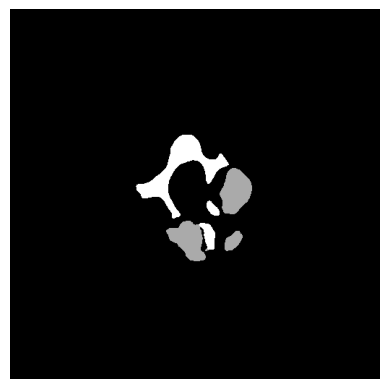

In [55]:
i = np.random.randint(depth-1)

print(f"Plotting layer {i}")

plt.imshow(image_data[:, :, i], cmap="gray")
plt.axis('off')
plt.show()

> A portion of the imaging datasets have been segmented automatically using a 3D UNET model, and radiologists modified and approved the segmentations. The provided segmentation labels have values of 1 to 7 for C1 to C7 (seven cervical vertebrae) and 8 to 19 for T1 to T12 (twelve thoracic vertebrae are located in the center of your upper and middle back), and 0 for everything else. As we focused on the cervical spine, all scans have C1 to C7 labels but not all thoracic labels.

<https://www.kaggle.com/competitions/rsna-2022-cervical-spine-fracture-detection/data>

In [18]:
segmented_labels: dict = {
  "C1": 1,
  "C2": 2,
  "C3": 3,
  "C4": 4,
  "C5": 5,
  "C6": 6,
  "C7": 7,
  "T1": 8,
  "T2": 9,
  "T3": 10,
  "T4": 11,
  "T5": 12,
  "T6": 13,
  "T7": 14,
  "T8": 15,
  "T9": 16,
  "T10": 17,
  "T11": 18,
  "T12": 19,
  "ELSE": 0
}

np.unique(image_data)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

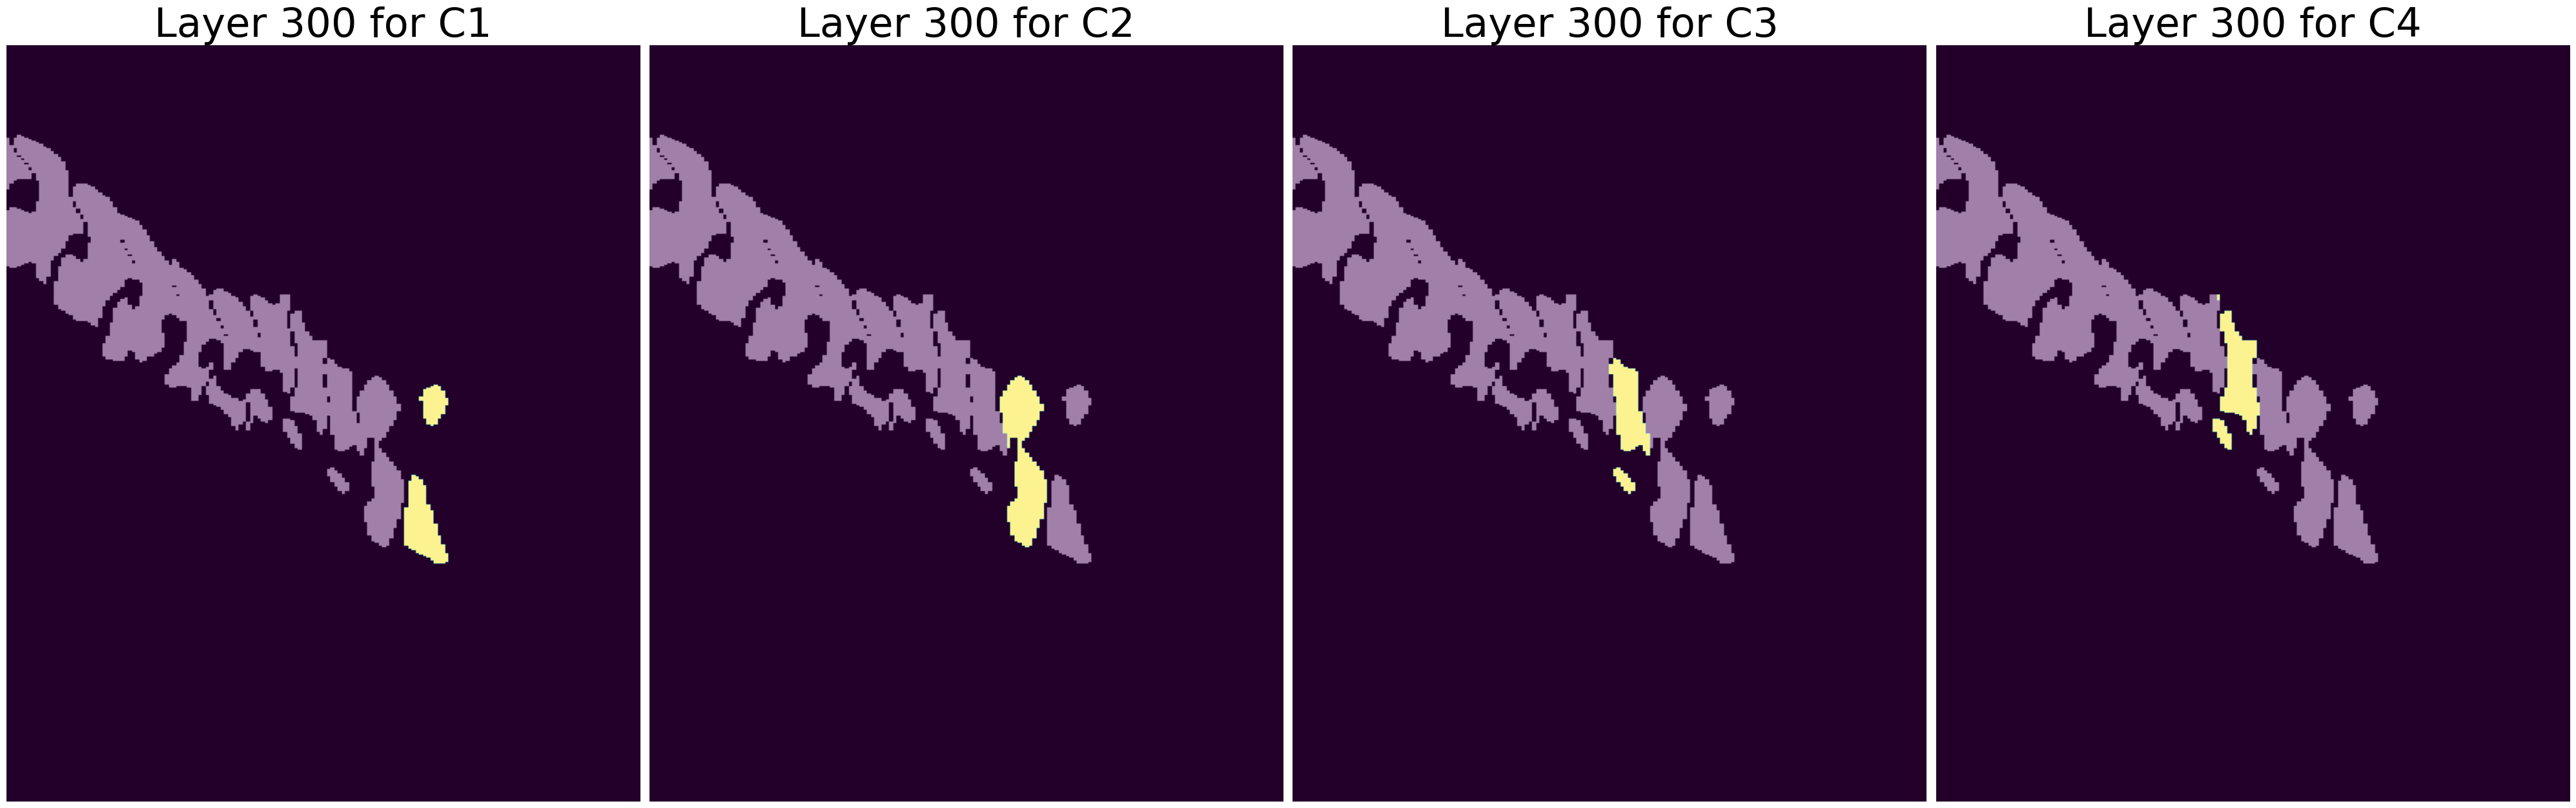

: 

In [57]:
layer = 300

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(40,25))
for i in range(4):
  img_label_str = list(segmented_labels.keys())[i]
  img = image_data[layer, :, :]
  mask = np.where(img == segmented_labels[img_label_str], 255, 0)
  ax[i].imshow(mask)
  ax[i].imshow(image_data[layer, :, :]>0, cmap="gray", alpha=0.5)
  ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
  ax[i].axis('off')
plt.tight_layout()
plt.show()